# Project description

You’ve decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so you and your partners decide to try to attract investors. They’re interested in the current market conditions—will you be able to maintain your success when the novelty of robot waiters wears off?
Your partners have asked you to prepare some market research. You have open-source data on restaurants in LA.

## Tables Of Contents <a class="anchor" id="table_of_contents"></a>

 ### [Step 1. Data preparation for analysis](#chapter1)

[1. Data investigation](#chapter1)
* [Concluisons](#chapter2)

[2. Data preparation](#chapter3)
* [Concluisons](#chapter4)


 ### [Step 2. Data analysis:](#chapter5)

[1. Investigate the proportions of the various types of establishments. Plot a graph.](#chapter6)

[2. Investigate the proportions of chain and non-chain establishments. Plot a graph.](#chapter7)

[3. Which type of establishment is typically a chain?](#chapter8)

[4. What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?](#chapter9)

[5. Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.](#chapter10)

[6. Put the data on street names from the address column in a separate column.](#chapter11)

[7. Plot a graph of the top ten streets by number of restaurants.](#chapter12)

[8. Find the number of streets that only have one restaurant.](#chapter13)

[9. For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?](#chapter14)

* [Draw an overall conclusion and provide recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain.](#chapter15)


 ### [Step 3. Presentation](#chapter16)

[Presentation: <link to cloud storage>](#chapter17)

## Step 1. Downloading the data and preparing it for analysis <a class="anchor" id="chapter1"></a>
- Downloading the data on restaurants in LA. 
- Optimizing the data for analysis. 
- Making sure each column contains the correct data type.
- Making sure there are no missing values.
- Making sure there are no duplicates.

### 1. Data investigation <a class="anchor" id="chapter1"></a>

In [1]:
# Let's import pandas and other necessary libraries and the datasets:

import pandas as pd
from matplotlib import ticker
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import PercentFormatter
import matplotlib.patches as mpatches
plt.style.use('seaborn-pastel')


dataset = r"/datasets/rest_data_us.csv"
data = pd.read_csv(dataset)

In [2]:
#investigating the 'data' dataset:
print(data.info())
print(data.head())
print(data.tail())
print(data.sample())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9648 non-null object
object_type    9651 non-null object
number         9651 non-null int64
dtypes: int64(2), object(4)
memory usage: 452.5+ KB
None
      id          object_name                    address  chain object_type  \
0  11786  HABITAT COFFEE SHOP     3708 N EAGLE ROCK BLVD  False        Cafe   
1  11787             REILLY'S        100 WORLD WAY # 120  False  Restaurant   
2  11788       STREET CHURROS  6801 HOLLYWOOD BLVD # 253  False   Fast Food   
3  11789    TRINITI ECHO PARK         1814 W SUNSET BLVD  False  Restaurant   
4  11790               POLLEN         2100 ECHO PARK AVE  False  Restaurant   

   number  
0      26  
1       9  
2      20  
3      22  
4      20  
         id      object_name                      address  chain object_type

In [3]:
#let's check if the dataset contains the duplicates:
data.duplicated().sum()

0

In [4]:
#checking the missing values by columns:
data.isnull().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [5]:
#checking 0 values:
for i in data.columns:
    print(i, len(data[data[i] == 0]))

id 0
object_name 0
address 0
chain 5972
object_type 0
number 0


In this case '0' in 'chain' column means 'False'.

In [6]:
data.describe(include=['object'])

,object_name,address,chain,object_type
count,9651,9651,9648,9651
unique,8672,8517,2,6
top,THE COFFEE BEAN & TEA LEAF,3607 TROUSDALE PKWY,False,Restaurant
freq,47,11,5972,7255


In [7]:
#let's take a look at value counts:
print(data['id'].value_counts().head())
print(data['object_name'].value_counts().head())
print(data['address'].value_counts().head())
print(data['chain'].value_counts().head())
print(data['object_type'].value_counts().head())
print(data['number'].value_counts().head())

18431    1
17762    1
13660    1
19803    1
17754    1
Name: id, dtype: int64
THE COFFEE BEAN & TEA LEAF    47
SUBWAY                        31
DOMINO'S PIZZA                15
KENTUCKY FRIED CHICKEN        14
WABA GRILL                    14
Name: object_name, dtype: int64
3607 TROUSDALE PKWY         11
135 N GRAND AVE             10
400 WORLD WAY                9
600 WORLD WAY                9
5151 STATE UNIVERSITY DR     9
Name: address, dtype: int64
False    5972
True     3676
Name: chain, dtype: int64
Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Name: object_type, dtype: int64
12    204
19    203
25    203
5     198
18    197
Name: number, dtype: int64


In [8]:
data[data.duplicated()]

,id,object_name,address,chain,object_type,number


### Conclusions <a class="anchor" id="chapter2"></a>
Investigating the 'data' dataset:
- The dataset consists of 9651 rows and 6 columns. Data types: int64(2), object(4). 
- Column names are self-descriptive and lowercase so I'won't change them except of changing 'number' to 'seats_number' for better understanding.
- I'll change the data type in 'chain' column to 'boolean' and in 'object_type' column to 'category' data type. 
- No duplicates found.
- 3 missing values found in 'chain' column.
- Unique values and value counts checked.

### Preparing the dataset <a class="anchor" id="chapter3"></a>

[Go back to the Table of Contents](#table_of_contents)

In [9]:
#checking the memory usage before data preparation
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9648 non-null object
object_type    9651 non-null object
number         9651 non-null int64
dtypes: int64(2), object(4)
memory usage: 2.4 MB


In [10]:
#changing the 'number' column name to 'seats_number'
data = data.rename(columns={"number": "seats_number"})

In [11]:
#checking precisely the missing values in 'chain' column
null_columns=data.columns[data.isnull().any()]
print(data[data['chain'].isnull()][null_columns])

     chain
7408   NaN
7523   NaN
8648   NaN


In [12]:
#dropping 3 missing rows:
data.dropna(subset = ['chain'], inplace=True)

In [13]:
#changing the data type in 'object_type' column to 'category' data type
data['object_type'] = data['object_type'].astype('category')
data['chain'] = data['chain'].astype('bool')

In [14]:
#checking the data types
data.dtypes

id                 int64
object_name       object
address           object
chain               bool
object_type     category
seats_number       int64
dtype: object

In [15]:
#checking the datasets and memory usage after data preparation:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
id              9648 non-null int64
object_name     9648 non-null object
address         9648 non-null object
chain           9648 non-null bool
object_type     9648 non-null category
seats_number    9648 non-null int64
dtypes: bool(1), category(1), int64(2), object(2)
memory usage: 1.6 MB


The memory usage became significantly lower.

### Conclusions <a class="anchor" id="chapter4"></a>
Preparing dataset:

- The data type changed in 'chain' column to 'boolean' and in 'object_type' column to 'category'. 
- 3 rows containing missing values removed.
- Changed the 'number' column name to 'seats_number'.

Other remarks:
- Memory usage calculated and reduced by 0.8 MB.

## Step 2.  Data analysis  <a class="anchor" id="chapter5"></a>

[Go back to the Table of Contents](#table_of_contents)

### 1. Investigate the proportions of the various types of establishments. Plot a graph. <a class="anchor" id="chapter6"></a>

In [16]:
print(data['object_type'].value_counts())

Restaurant    7253
Fast Food     1066
Cafe           435
Pizza          319
Bar            292
Bakery         283
Name: object_type, dtype: int64


There are 7523 restaurants, 1066 fast food establishments and 435 cafes in LA.

In [17]:
#normalizing types of establishments and determining their share
establishment_proportion = data['object_type'].value_counts(normalize=True)
establishment_proportion

Restaurant    0.751762
Fast Food     0.110489
Cafe          0.045087
Pizza         0.033064
Bar           0.030265
Bakery        0.029333
Name: object_type, dtype: float64

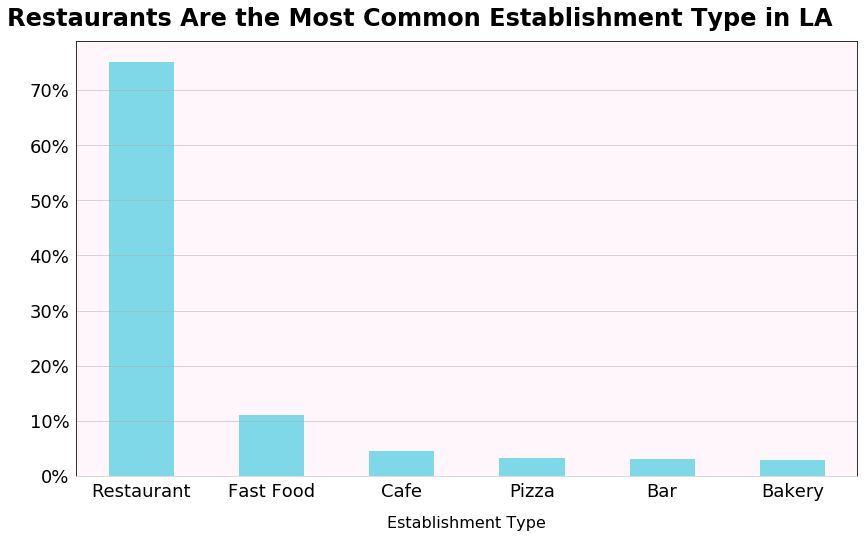

In [18]:
#plotting a graph
fig,ax = plt.subplots(facecolor='white')
establishment_proportion.plot(kind='bar',
                                   figsize=(14, 8),
                                   rot=0,
                                   alpha=.5, color='#00bcd4')
ax.set_facecolor("#fef6fb")

#setting tick parameteres
ax.tick_params(labelsize=18)
ax.tick_params(axis='both', left=False, bottom=False)
ax.yaxis.set_major_formatter(PercentFormatter(1))

#setting grid and spines parameteres
plt.grid(False, axis='x')
plt.grid(axis='y', linewidth=.5, zorder=2)
ax.spines['bottom'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')

#setting labels
plt.xlabel('Establishment Type',labelpad=15, fontsize=16)
plt.title("Restaurants Are the Most Common Establishment Type in LA",
          fontweight='semibold',
          fontsize=24,
          x=.44,
          pad=15)

plt.show()

### Conclusions
There are 7523 restaurants, 1066 fast food establishments and 435 cafes in LA.

Restaurants are the most common establishment type in LA (around 75%), next type by popularity is Fast Food (around 10%), 3rd place goes to Cafe - around 5% of establishments.

### 2. Investigate the proportions of chain and non-chain establishments. Plot a graph. <a class="anchor" id="chapter7"></a>

[Go back to the Table of Contents](#table_of_contents)

In [19]:
#getting proportion of chain establishments in LA
proportion_chain = data['chain'].value_counts(normalize=True) * 100
proportion_chain

False    61.898839
True     38.101161
Name: chain, dtype: float64

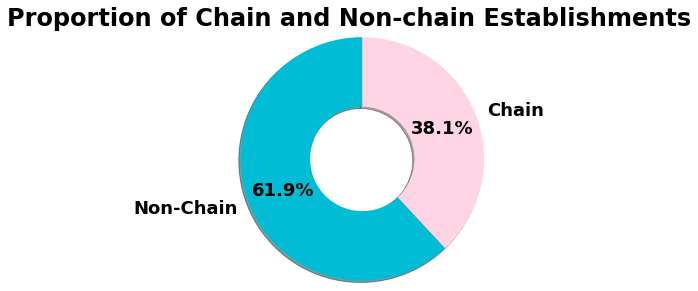

In [20]:
#plotting a graph
#setting background
fig, ax = plt.subplots(facecolor='white')

#setting proportion dataset, labels and text parametres
patches, texts, autotexts = plt.pie(proportion_chain,
                                    labels=['Non-Chain', 'Chain'],
                                    labeldistance=1.1,
                                    shadow=True,
                                    colors=['#00bcd4', '#ffd5e5'],
                                    autopct='%1.1f%%',
                                    textprops={
                                        'fontsize': 18,
                                        'fontweight': 'bold'
                                    },wedgeprops=dict(width=0.8),
                                     startangle=90,
                                    pctdistance=0.70,
                                    radius=1.4)

#setting font size
texts[0].set_fontsize(18)
texts[1].set_fontsize(18)
#setting text colour
for text in texts:
    text.set_color('black')
    
#setting title
plt.title("Proportion of Chain and Non-chain Establishments",
          fontweight='semibold',
          fontsize=24,
          x=.44,
          pad=25)

plt.show()

### Conclusions
Among all the establishments given in the source dataset there are 38.1% of chain establishments and 61.9% non-chain.

### 3. Which type of establishment is typically a chain? <a class="anchor" id="chapter8"></a>

[Go back to the Table of Contents](#table_of_contents)

In [21]:
#pivoting table representing establishment chain proportion
establishment_chain_proportion = data.pivot_table(index='object_type',
                                                values='chain').sort_values(
                                                    'chain', ascending=False)
establishment_chain_proportion

,chain
object_type,
Bakery,1.000000
Cafe,0.611494
Fast Food,0.567542
Pizza,0.479624
Restaurant,0.316007
Bar,0.263699


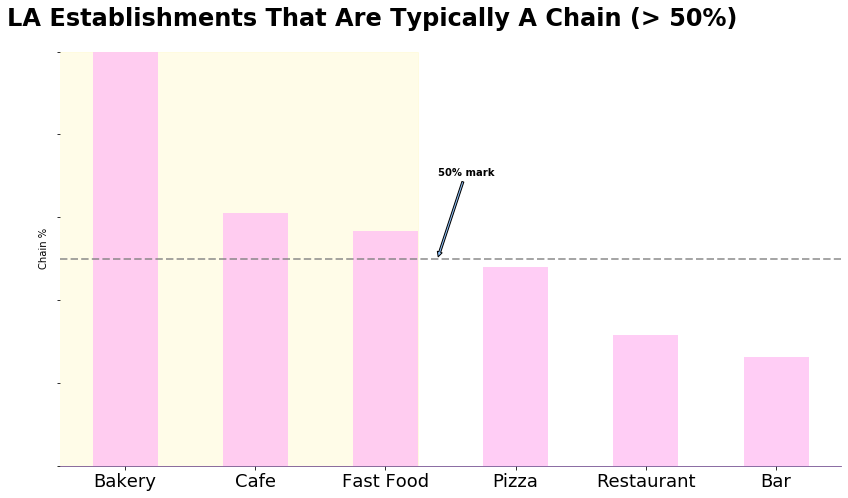

In [22]:
#plotting a bar graph representing establishment chain proportion
fig, ax = plt.subplots(figsize=(14, 8), facecolor='white')

#setting the background color
ax.set_facecolor("white")

#setting proportion dataset and text parametres
establishment_chain_proportion.plot(kind='bar',
                                    rot=0,
                                    ax=ax,
                                    alpha=.8,
                                    legend=False, color='#ffc1f3')
#setting 50% middle line
plt.axhline(.5, xmin=0, linewidth=2, linestyle='--', alpha=.7, color='gray')

#setting the shading and outline color
plt.fill_between(
    (-.8, 2.25), 1, 0,
    color='#fff48f',
    alpha=0.2)

#setting the tick 
ax.tick_params(axis='x', labelsize=18)
ax.yaxis.set_major_formatter(PercentFormatter(1))

#marking 50% middle line with an arrow
plt.annotate("50% mark",
             xy=(2.4, .5),
             xytext=(2.4, .7),
             color='black',fontweight='bold',
             arrowprops=dict(arrowstyle="simple"))

#setting the spines
sns.despine()
ax.spines['bottom'].set_color('#6f4a8e')
ax.spines['left'].set_visible(False)
plt.grid(False, axis='both')

#defining the labels
ax.set_yticklabels('')
plt.xlabel("")
plt.ylabel('Chain %')
plt.title("LA Establishments That Are Typically A Chain (> 50%)",
          fontsize=24,
          x=.40,
          pad=0,
          fontweight='semibold')

plt.show()


### Conclusions
Among the establishments in LA Bars(26%) and Restaurants(31%) are typically non-chain.
On the other hand ALL the bakeries belong to a chain and around 60% of cafe, and 56% of Fast Food.

### 4. What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats? <a class="anchor" id="chapter9"></a>

[Go back to the Table of Contents](#table_of_contents)

In [23]:
#defining the number of seats for all chain establishments
is_chain_seat_num = data[data['chain'] == True]['seats_number']

In [24]:
#printing the mode and investigating the values for number of seats in chains
print(is_chain_seat_num.agg('mode'))
is_chain_seat_num.describe()

0    12
dtype: int64


count    3676.000000
mean       39.694233
std        43.437212
min         1.000000
25%        13.000000
50%        25.000000
75%        44.000000
max       229.000000
Name: seats_number, dtype: float64

Among the chain establishments the mode number of seats is 12, mean is 39.7 and median is 25 seats. Maximum number of seats is 229, standard deviation is 43 seats.

In [25]:
print("Less than or Equal to 49:",
      is_chain_seat_num[is_chain_seat_num >= 49].sort_values().head(10).values)

print("Greater than 49:",
      is_chain_seat_num[is_chain_seat_num > 49].sort_values().head(10).values)

Less than or Equal to 49: [49 49 49 49 49 49 49 49 49 49]
Greater than 49: [61 61 61 62 62 62 62 62 62 62]


Let's create the categories to represent the data in a more satisfying way. I've decided to use for places with number of seats less than 50 the 'few' category and 'many' for the rest of establishments.

In [26]:
#defining the category for places with number of seats less than 50 as 'few' and 'many' for the rest
#adding the seat category as a column to the source dataset
data['seat_category'] = data['seats_number'].apply(
    lambda x: 'few' if x < 50 else 'many')
data['seat_category'].head()

0    few
1    few
2    few
3    few
4    few
Name: seat_category, dtype: object

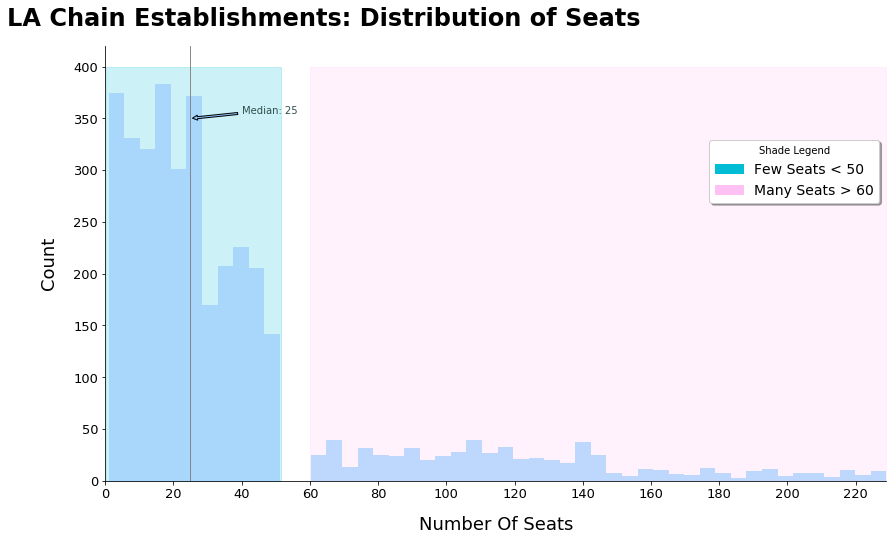

In [27]:
#plotting the hist graph
fig, ax = plt.subplots(figsize=(14,8), facecolor='white')
#setting the background color
ax.set_facecolor("xkcd:white")
plt.hist(is_chain_seat_num, alpha=.6, bins=50)

#shading and median
plt.fill_between(
    (0.1, 51.5), 400, 0,
    color='#00bcd4', 
    alpha=0.2)
plt.fill_between(
    (60, is_chain_seat_num.max()), 400, 0,
    color='#ffc1f3',  
    alpha=0.2)
#setting the median line
plt.axvline(is_chain_seat_num.median(), color='gray', linewidth=.9)

#setting the ticks
plt.xlim(0, is_chain_seat_num.max())
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.tick_params(labelsize=13)

#annotating the legend and setting its parametres
azure_patch = mpatches.Patch(color='#00bcd4', label='Few Seats < 50')
pink_patch = mpatches.Patch(color='#ffc1f3', label='Many Seats > 60')
plt.legend(handles=[azure_patch, pink_patch],
           loc='upper right',
           title='Shade Legend',
           facecolor='white',
           fancybox=True,
           shadow=True,bbox_to_anchor=(0, 0, 1, .8),
           fontsize=14
          )

#annotating the median line, despining, and setting grid parametres
plt.annotate("Median: " + str(int(is_chain_seat_num.median())),
             xy=(25, 350),
             xytext=(40, 355),
             color='darkslategray',
             arrowprops=dict(arrowstyle="simple"))
sns.despine()
plt.grid(False, axis='x')

#setting title and labels
plt.title("LA Chain Establishments: Distribution of Seats",
          fontsize=24,
          x=.28,
          pad=20,
          fontweight='bold')
plt.xlabel('Number Of Seats', labelpad=15, fontsize=18)
plt.ylabel('Count', labelpad=15, fontsize=18)

plt.show()

In [28]:
data[data['chain'] == True]['seat_category'].value_counts(normalize=True)

few     0.825082
many    0.174918
Name: seat_category, dtype: float64

### Conclusions 

There are much more restaurants with low number of seats (1-50 seats) - around 82% of establishments. So if we comapair the shade of chain establishments with many seats, the places are characterized by a few establishments with a lot of seats.

### 5. Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs. <a class="anchor" id="chapter10"></a>

[Go back to the Table of Contents](#table_of_contents)

In [29]:
# chain establishment, and seat category
establishment_seat = data[data['chain'] == True][['object_type', 'seat_category']]

In [30]:
establishment_seat = pd.get_dummies(establishment_seat,
                                    columns=['seat_category']).copy()

In [31]:
#pivoting a table with 'few' and 'many' categories for mean number of seats
establishment_seat_pivot = establishment_seat.groupby(
    'object_type').mean().sort_values('seat_category_many')
establishment_seat_pivot

,seat_category_few,seat_category_many
object_type,,
Cafe,0.966165,0.033835
Bakery,0.950530,0.049470
Pizza,0.928105,0.071895
Fast Food,0.818182,0.181818
Restaurant,0.790140,0.209860
Bar,0.766234,0.233766


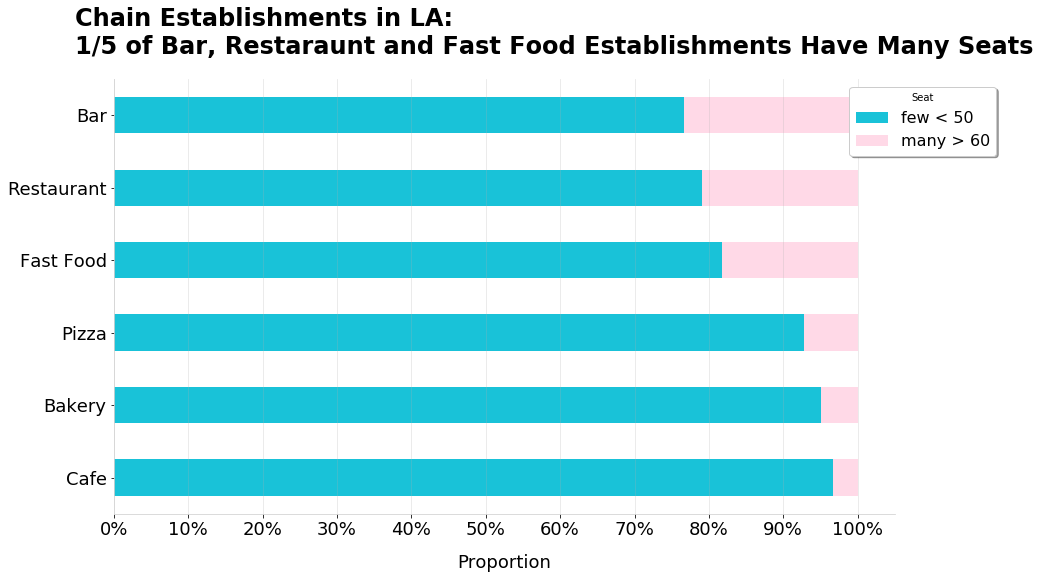

In [32]:
#plotting the stacked bar chart to charachterize the data by proportion
fig, ax = plt.subplots(figsize=(14,8), facecolor='white')
ax.set_facecolor("xkcd:white")
establishment_seat_pivot.plot.barh(stacked=True, ax=ax, alpha=.9, color=['#00bcd4','#ffd5e5'])

#defining the spines and grid
sns.despine()
plt.grid(False, axis='y')
plt.grid(axis='x', alpha=.3)
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
#creating the legend
plt.legend(['few < 50', 'many > 60'],
           shadow=True,
           fancybox=True,
           title='Seat',
           facecolor='white',
           fontsize=16,
           bbox_to_anchor=(0, 0, 1.14, 1))

#setting the tick
ax.tick_params(labelsize=18)
ax.xaxis.set_major_locator(ticker.MultipleLocator(.10))

#formatting to percent values
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1))

#setting the title and labels
plt.ylabel('')
plt.xlabel('Proportion', labelpad=15, fontsize=18)
plt.title(
    "Chain Establishments in LA: \n1/5 of Bar, Restaraunt and Fast Food Establishments Have Many Seats",
    pad=25,
    fontweight='semibold',
    fontsize=24,
    x=-.05,
    ha='left')

plt.show()


Most of the chain establishments lean to have small amount of seats (less than 50). Around 20% percent of Bars and Restaurants have many seats, and Cafe chains are very small by number of seats (only 3% of them are big).

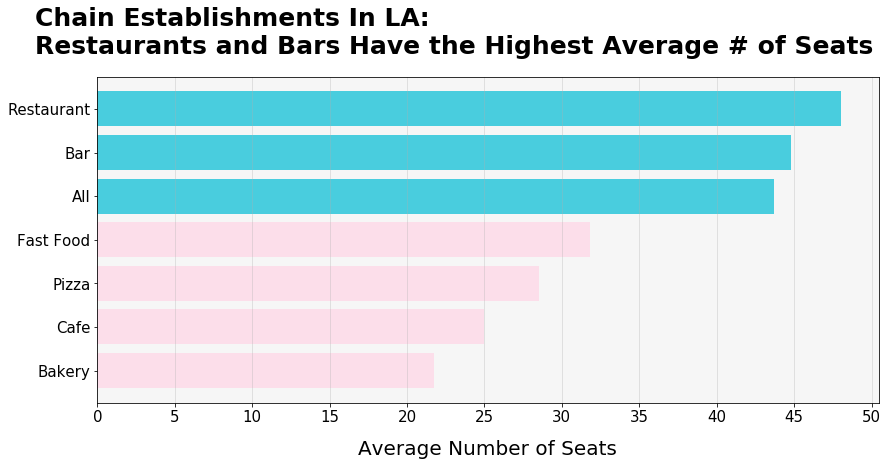

In [33]:
#plotting the stacked bar chart to charachterize the data by number of seats
fig, ax = plt.subplots(figsize=(14,6), facecolor='white')
ax.set_facecolor("#f6f6f6")
avg_seat_establishment = data.pivot_table(index='object_type',
                                        values='seats_number',
                                        margins=True,
                                        aggfunc='mean')
color = [
    '#00bcd4' if int(i) > 40 else '#ffd5e5'
    for i in avg_seat_establishment.sort_values('seats_number').values]

ax.barh(avg_seat_establishment.sort_values('seats_number').index,
        avg_seat_establishment.sort_values('seats_number')['seats_number'],
        color=color,
        alpha=.7)

ax.tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))


plt.grid(False, axis='y')
plt.grid(axis='x', alpha=.4)

plt.xlabel("Average Number of Seats", labelpad=15, fontsize=20)
plt.ylabel("", labelpad=10, fontsize=20)
plt.title(
    "Chain Establishments In LA:\nRestaurants and Bars Have the Highest Average # of Seats",
    x=-.08,
    pad=23,
    size=25,
    ha='left',
    fontweight='semibold')

plt.show()

In [34]:
#transposing the table with average number of seats for each type of establishments
avg_seat_establishment.sort_values('seats_number').transpose()

object_type,Bakery,Cafe,Pizza,Fast Food,All,Bar,Restaurant
seats_number,21.773852,25.0,28.545455,31.837711,43.703566,44.767123,48.048807


In [35]:
#defining the proporion of few and many seats NOT IN Restaurants and Bars
data.query("object_type not in ['Restaurant','Bar']")['seat_category'].value_counts(
    normalize=True) * 100

few     90.917737
many     9.082263
Name: seat_category, dtype: float64

In [36]:
#defining the proporion of few and many seats in Restaurants and Bars
data.query("object_type in ['Restaurant','Bar']")['seat_category'].value_counts(
    normalize=True) * 100

few     76.169649
many    23.830351
Name: seat_category, dtype: float64

### Conclusions
The majority (90%) of Fast Food, Pizza, Cafe and Bakeries have less than 50 seats, 9% of them have more than 50 seats.
Most of(76%) Bars and Restaurants have few seats, 24% of them have more than 50 seats.

### 6. Put the data on street names from the address column in a separate column.<a class="anchor" id="chapter11"></a>

[Go back to the Table of Contents](#table_of_contents)

In [37]:
#defining the varible to store street endings
endings = ['BLVD','ST','AVE','RD','DR','WAY']

In [38]:
#defining the varible to store street names
extra=['WORLD WAY', 'W SUNSET BLVD', 'ECHO PARK AVE', 'NATIONAL BLVD', 'W 6TH ST STE', 'N CAHUENGA BLVD', 
       'S WESTERN AVE STE', 'WILSHIRE BLVD', 'S OXFORD AVE', 'MELROSE AVE', 'WALL ST STE', 'S SAN VICENTE BLVD', 
       'S INDIANA ST', 'N LA CIENEGA BLVD', 'W 3RD ST', 'S ALVARADO ST STE 111C', 'WALL ST', 'S WESTERN AVE', 
       'W SUNSET BLVD STE', 'GLENDALE BLVD', 'N FIGUEROA ST', 'W PICO BLVD', 'WORLD WAY LVL6 SP5', 
       'W OLYMPIC BLVD', 'S FLOWER ST STE B420', 'N VINE ST', 'W 5TH ST', 'S HOPE ST', 'HOLLYWOOD BLVD', 
       'KNOX AVE', 'AIRPORT BLVD', 'S FLOWER ST B-270', 'MARIACHI PLZ', 'ROSWELL ST', 'FRANKLIN AVE', 
       'S FLOWER ST', 'WORLD WAY 7C', 'W OLYMPIC BLVD STE', 'S GRAND AVE', 'S FLOWER ST B-15', 'WORLD WAY S4', 
       'E OLYMPIC BLVD', 'PASADENA AVE', 'WORLD WAY T81', 'WORLD WAY 5TH FLR', 'N GLENDALE BLVD', 
       'HOLLYWOOD BLVD -221', 'HOLLYWOOD BLVD STE', 'AVION DR', 'W MANCHESTER AVE LOS', 'E 11TH ST', 
       'CAHUENGA BLVD W', 'S FIGUEROA ST LBBY LOBBY', 'N FAIRFAX AVE STE', 'BEVERLY BLVD', 'W MANCHESTER AVE', 
       'COLORADO BLVD STE', 'W SUNSET BLVD A120', 'WESTWOOD PLZ', 'WESTWOOD PLZ A233B', 'W CHICK HEARN CT', 
       'W 6TH ST', 'WORLD WAY T38', 'LOS FELIZ BLVD STE', 'E 7TH ST', 'WORLD WAY T48', 'E CESAR E CHAVEZ AVE', 
       'PORTER ST', 'S NORMANDIE AVE', 'GAYLEY AVE', 'S SOTO ST', 'E 59TH ST', 'SUNSET BLVD', 'W SLAUSON AVE', 
       'WILSHIRE BLVD STE A3-A5', 'W 8TH ST', 'E 4TH ST', 'N LA BREA AVE', 'SOTO ST STE', 'S SEPULVEDA BLVD', 
       'WHITTIER BLVD', 'S VERMONT AVE', 'W 6TH ST 2B', 'W 87TH ST', 'DIVISION ST', 'S FIGUEROA ST STE 418A', 
       'S CENTRAL AVE', 'WABASH AVE', 'S BROADWAY', 'CRENSHAW BLVD', 'S NEW HAMPSHIRE AVE F1', 'S SERRANO AVE', 
       'S FIGUEROA ST 35TH', 'W 6TH ST A', 'LA PUERTA ST', 'W CENTURY BLVD', 'S LA BREA AVE', 'SANTEE ST', 
       'WILSHIRE BLVD STE I', 'LINCOLN BLVD', 'S IROLO ST STE', 'W 7TH ST', 'W TEMPLE ST']

In [39]:
#creating a filtering function for the list of addresses
def filters(extra):
    new= []
    y=extra.split(' ')
    for i in y:
        if i in endings and i != 'STE': 
            new.append(i)
            return " ".join(new)
        elif i == 'STE':
            return " ".join(new)
        new.append(i)
    return " ".join(new)

In [40]:
#defining a function cleaning the addresses from numbers
def get_street(x):
    split_address = x.replace("#", "").replace("/", "").split()
    new = []
    for i in split_address:
        if i.isdigit():
            continue
        else:
            new.append(i)
    return ' '.join(new)

In [41]:
#creating a column for the filtered street names
data['street'] = data['address'].apply(
    lambda x: get_street(x)).apply(lambda x: filters(x))

In [42]:
#printing the first 20 street names by number of counts
print(data['street'].value_counts().head(20))

WILSHIRE BLVD        384
W SUNSET BLVD        368
W PICO BLVD          342
S WESTERN AVE        277
SANTA MONICA BLVD    262
HOLLYWOOD BLVD       241
W OLYMPIC BLVD       234
W 3RD ST             231
S FIGUEROA ST        228
S VERMONT AVE        213
W 6TH ST             213
BEVERLY BLVD         162
MELROSE AVE          149
WORLD WAY            145
E 1ST ST             111
W 8TH ST             106
S CENTRAL AVE        101
W 7TH ST             100
VENICE BLVD           99
N FIGUEROA ST         99
Name: street, dtype: int64


### Conclusions
We have cleaned the street names from numbers by applying the functions named 'filters' and 'get_street' and created a 'street' column from addresses storing them.

### 7. Plot a graph of the top ten streets by number of restaurants.<a class="anchor" id="chapter12"></a>

[Go back to the Table of Contents](#table_of_contents)

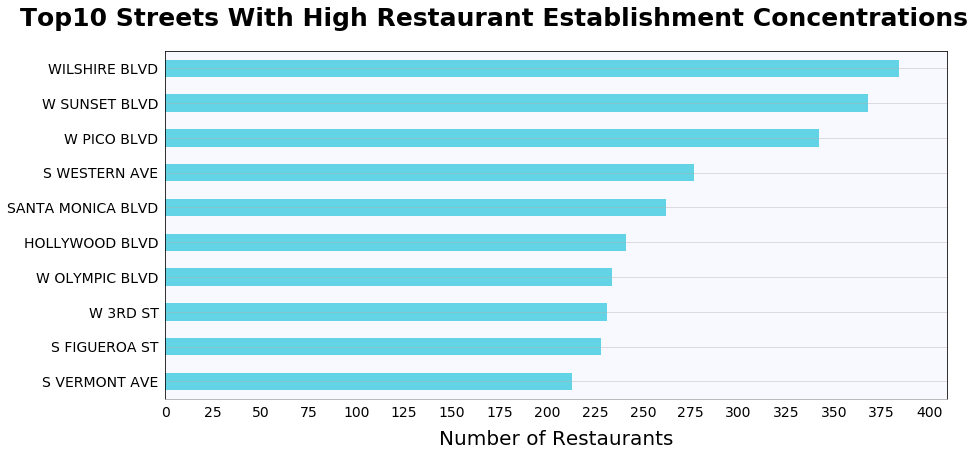

In [43]:
#plotting a graph showing top 10 streets by the number of establishments
fig, ax = plt.subplots(facecolor='white')
#setting the background color
ax.set_facecolor("ghostwhite")
#creating a bar plot from top10 'street' column values 
data['street'].value_counts().head(10).sort_values().plot.barh(figsize=(14,6.4),
                                                         rot=0,
                                                         alpha=.6, color='#00bcd4')

plt.xlim(0,data['street'].value_counts().max()+25)
ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
#setting tick
ax.tick_params(axis='both', left=False, bottom=False, labelsize='14')
#setting spine and grid
ax.spines['bottom'].set_color('darkgray')
plt.grid(False, axis='x')
plt.grid(axis='y',alpha=.5)
#naming and formatting the axis label and title
plt.ylabel('', labelpad=15, fontsize=20)
plt.xlabel('Number of Restaurants',labelpad=10,size=20)
plt.title("Top10 Streets With High Restaurant Establishment Concentrations",
          fontsize=25,
          x=.42,
          fontweight='semibold',
          pad=25)

plt.show()

### Conclusion
Top3 streets are well defined and they are Wilshire blvd (highly visited street next to Beverly Hills) , W Sunset blvd (famous street next to Hollywood) and W Pico blvd(highly visited streed crossing the Wilshire blvd), having 340+ establishments situated there. These Top10 streets are having between 200 and 380 establishments each. We should consider opening there if we keep in mind that these are extremely competitive areas, so our offer has to be really unique and outstanding (as it is, actually; robot-run cafe is not that common, you know).

### 8. Find the number of streets that only have one restaurant.<a class="anchor" id="chapter13"></a>

[Go back to the Table of Contents](#table_of_contents)

In [44]:
#printing the total number of streets
print('Count (All):', len(data['street'].value_counts()))
#printing the number of streets having only one restautrant
print(
    '1 restaurant (Count):',
    len(data['street'].value_counts()[
        data['street'].value_counts() == 1]))
#printing the proportion of streets having only one restaurant
print(
    '1 Restaurant (%):',
    len(data['street'].value_counts()[
        data['street'].value_counts() == 1]) /
    len(data['street'].value_counts()))

Count (All): 795
1 restaurant (Count): 372
1 Restaurant (%): 0.4679245283018868


### Conclusion
Surprisingly around 47% of streets (372 out of 795) are having only one restaurant.

### 9. For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?<a class="anchor" id="chapter14"></a>

[Go back to the Table of Contents](#table_of_contents)

Let's investigate the distribution of number of streets and establshments placed there by plotting a hist.

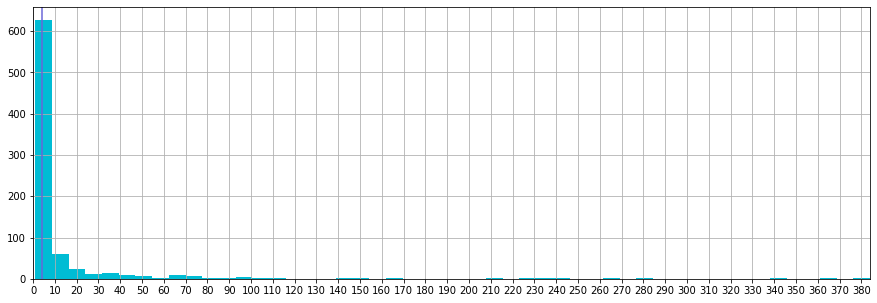

In [45]:
#plotting a hist reflecting the distribution of number of streets and establshments placed there
ax=data['street'].value_counts().hist(bins=50,figsize=(15,5), color='#00bcd4')
#defining 68% quantile line to mark the number of streets having most of the restaurants
plt.axvline(data['street'].value_counts().quantile(.68), color='#6a65d8')
#setting the max limit
plt.xlim(0, data['street'].value_counts().max())
#setting the tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()

From this hist we see that 600+ streets are having up to 10 restaurants placed around them. We can call the streets with more than 10 restaurants as 'having a lot of restaurants' according to the distribution visualized before.

In [46]:
#defining the streets with more than 10 establishments
street_more_than_10_restaurants = data['street'].value_counts()[
    data['street'].value_counts() > 10].index

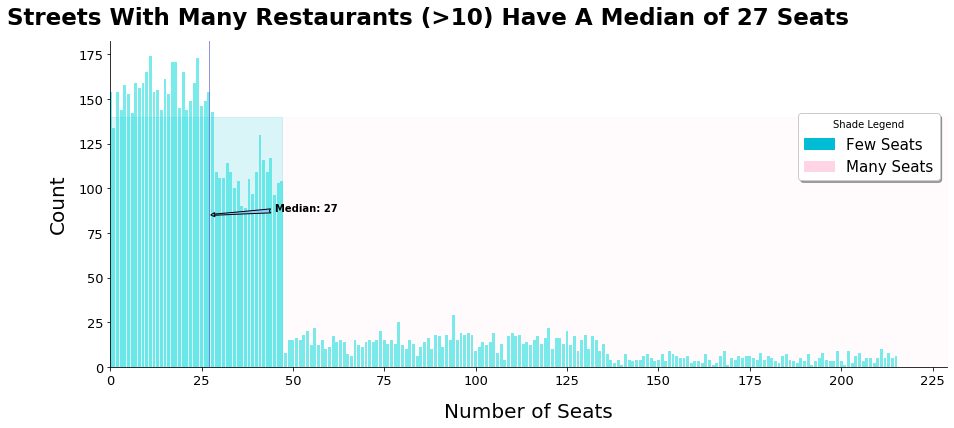

In [47]:
#defining the restaurants with more than 10 establishments
lots_restaurant_number_seats = data.query(
    "street in @street_more_than_10_restaurants")['seats_number']

#plotting a graph
fig, ax = plt.subplots(figsize=(15,6), facecolor='white')
sns.countplot(lots_restaurant_number_seats, alpha=.6, color='cyan')
#setting a median line for number of seats in the streets with more than 10 restaurants
plt.axvline(lots_restaurant_number_seats.median(), alpha=.7, linewidth=1, color='#6a65d8')
#setting background colour
ax.set_facecolor("white")

#setting the ticks
freq = int(25)
xticks = ax.get_xticks()
ax.set_xticks(np.append(xticks[::25], lots_restaurant_number_seats.max() - 4))
ax.set_xticklabels(
    np.append(xticks[::25],
              lots_restaurant_number_seats.max() - 4))
#setting the max x value
plt.xlim(0, lots_restaurant_number_seats.max())
ax.tick_params(labelsize=13)

#annotaition paramtres
plt.annotate("Median: " + str(int(lots_restaurant_number_seats.median())),
             xy=(lots_restaurant_number_seats.median(), 85),
             xytext=(45, 87),fontweight='bold',
             arrowprops=dict(arrowstyle="fancy"))
#despining
sns.despine()

#setting the filling colours
plt.fill_between(
    (0.1, 47), 140,0,
    color='#00bcd4',  
    alpha=0.15)
plt.fill_between(
    (47.01, lots_restaurant_number_seats.max()),140,0,
    color='#ffd5e5',  
    alpha=0.1)

#setting patches parametres
azure_patch = mpatches.Patch(color='#00bcd4', label='Few Seats')
pink_patch = mpatches.Patch(color='#ffd5e5', label='Many Seats')
plt.legend(handles=[azure_patch, pink_patch],
           loc='upper right',
           title='Shade Legend',
           facecolor='white',
           fancybox=True,bbox_to_anchor=(0, 0, 1, .80),
           shadow=True,
           fontsize=15)

#setting the labels and title paramtres
plt.xlabel("Number of Seats", labelpad=15, fontsize=20)
plt.ylabel("Count", labelpad=10, fontsize=20)
plt.title("Streets With Many Restaurants (>10) Have A Median of 27 Seats\n  ",
          fontsize=23,
          x=.38,
          y=.95,
          fontweight='semibold')
plt.show()

The pattern seen from the graph strongly correlates with the overall number of seats distribution graph made before.

In [48]:
#defining the streets mith many chain establishments
is_over10restaurant_chain = data.query(
    "street in @street_more_than_10_restaurants and chain==True")
#defining the streets mith few chain establishments
is_over10restaurant_non_chain = data.query(
    "street in @street_more_than_10_restaurants and chain==False")

In [49]:
#creating a variable storing the number of seats in the streets mith many chain establishments
chain_restaraunt_many_street = is_over10restaurant_chain['seats_number']
#creating a variable storing the number of seats in the streets mith many non-chain establishments
non_chain_restaraunt_many_street = is_over10restaurant_non_chain['seats_number']

In [50]:
#explorong the maximum number of seats in the streets mith many chain and non-chain establishments
chain_restaraunt_many_street.max(), non_chain_restaraunt_many_street.max()

(229, 229)

The maximum of seats in the streets mith many chain and non-chain establishments is equal and is 229.

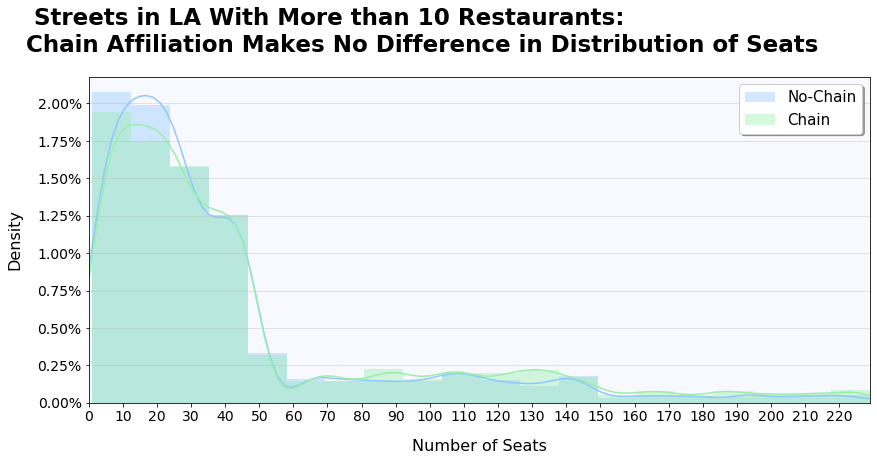

In [51]:
#plotting a graph to visualize if chain affiliation makes difference in distribution of seats
fig, ax = plt.subplots(figsize=(14,6), facecolor='white')
ax.set_facecolor("ghostwhite")
sns.distplot(chain_restaraunt_many_street, bins=20)
sns.distplot(non_chain_restaraunt_many_street, bins=20)

def mjrFormatter(x, pos):
    return "{:.2f}%".format(x * 100)
plt.grid(False, axis='x')
plt.grid(axis='y',alpha=.4)
plt.xlim(0, chain_restaraunt_many_street.max())
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(mjrFormatter))

plt.legend(['No-Chain', 'Chain'], fancybox=True, shadow=True, fontsize=15,facecolor='white')

plt.xlabel('Number of Seats', labelpad=15, fontsize=16)
plt.ylabel('Density', labelpad=15, fontsize=16)
plt.title(
    " Streets in LA With More than 10 Restaurants:\nChain Affiliation Makes No Difference in Distribution of Seats",
    fontsize=23,
    x=-.08,
    pad=25,
    ha='left',
    fontweight='semibold')

plt.show()

#### Conclusion
From the graph we see that the type of establishment (chain or non-chain) doesn't affect the number of seats.

## Overall conclusion and  recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain.<a class="anchor" id="chapter15"></a>

[Go back to the Table of Contents](#table_of_contents)

### Conclusions
There are 7523 restaurants, 1066 fast food establishments and 435 cafes in LA. Total 9,651 establishments.

- restaurants are the most common establishment type in LA (around 75%), 
- next type by popularity is Fast Food (around 10%), 
- 3rd place goes to Cafe - around 5% of market share,
- Pizza has 3% of market share

Among all the establishments given in the source dataset there are:
- 38.1% of chain establishments
- 61.9% non-chain.

Among the establishments in LA Bars(26%) and Restaurants(31%) are typically non-chain.
Chains:
- ALL the Bakeries belong to a chain
- around 60% of Cafe belong to a chain
- and 56% of Fast Food belong to a chain
- 48% of Pizza belong to a chain

There are much more restaurants with low number of seats (1-50 seats) - around 82% of establishments.
- most of the chain establishments lean to have small amount of seats (less than 50)
- around 20% percent of Bars and Restaurants have many seats (more than 50)
- Cafe chains are very small by number of seats (only 3% of them are big)

The majority(90%) of Fast Food, Pizza, Cafe and Bakeries have less than 50 seats, 9% of them have more than 50 seats.
Most of(76%) Bars and Restaurants have few seats, 24% of them have more than 50 seats.

Top3 streets are well defined and they are:
- Wilshire blvd (highly visited street next to Beverly Hills),
- W Sunset blvd (famous street next to Hollywood),
- W Pico blvd(highly visited streed crossing the Wilshire blvd), 
having 340+ establishments situated there. We should consider opening there if we keep in mind that these are extremely competitive areas, so our offer has to be really unique and outstanding (as it is, actually).
- the Top10 streets are having 200+ establishments each. Median for them is 27 seats. 
- chains have a median of 25 seats. 

- 600+ streets are having up to 10 restaurants placed around them. 

### Recommendation
The Restaurant is a too common type of establishmet in LA (68% of market share), so:
- I'd consider opening a Cafe or Pizza place with 25-30 seats (average number for this category). They have a high potential to grow into a chain. Both of them have a small market share (5% and 3% respectively), we should keep in mind that the type of establishment (chain or non-chain) doesn't affect the number of seats;
- start as a non-chain Cafe in the street from Top10 list with many restaurants. It will be challenging, but as the concept of our cafe is fresh and outstanding (robot-waiters) it should be able to compete with the others;
- when growing into a chain focus on the streets having less than 10 restaurants.

[Go back to the Table of Contents](#table_of_contents)

## Step 3. Presentation<a class="anchor" id="chapter16"></a>

### [Presentation](https://drive.google.com/file/d/1z_GsanX_8wrvtINISAE3bj95cPJzRyw_/view?usp=sharing)<link to cloud storage> <a class="anchor" id="chapter17"></a>

[Go back to the Table of Contents](#table_of_contents)